BOA app review data analysis

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configure your database connection
db_host = 'localhost'
db_port = '5432'
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'ocho'

# Create the database URL
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Load the CSV file into a DataFrame
app_filepath = '../data/app_reviews.csv'
reviews_df = pd.read_csv(app_filepath)

# Write the DataFrame to a new table in the PostgreSQL database
reviews_df.to_sql('app_review', engine, if_exists='replace', index=False)

print("Data saved successfully.")

Data saved successfully.


In [3]:
# Function to load data from the database
def load_data(engine):
    
    reviews_df = pd.read_sql('SELECT * FROM app_review', engine)
    return  reviews_df

In [7]:
# Function for data summarization and quality assessment
def data_summary(reviews_df):
    print("Ads Data Summary:")
    print(reviews_df.describe())
  

In [8]:
data_summary(reviews_df)

Ads Data Summary:
            likes  reply_content  replied_at       score  keywords  \
count  100.000000            0.0         0.0  100.000000       0.0   
mean     4.020000            NaN         NaN    2.870000       NaN   
std     13.822087            NaN         NaN    1.801543       NaN   
min      0.000000            NaN         NaN    1.000000       NaN   
25%      0.000000            NaN         NaN    1.000000       NaN   
50%      1.000000            NaN         NaN    2.000000       NaN   
75%      2.000000            NaN         NaN    5.000000       NaN   
max    115.000000            NaN         NaN    5.000000       NaN   

       lda_category  sentiment  insight  
count           0.0        0.0      0.0  
mean            NaN        NaN      NaN  
std             NaN        NaN      NaN  
min             NaN        NaN      NaN  
25%             NaN        NaN      NaN  
50%             NaN        NaN      NaN  
75%             NaN        NaN      NaN  
max            

In [11]:
def data_show(reviews_df):
    print(reviews_df.head)

In [12]:
data_show(reviews_df)

<bound method NDFrame.head of                                review_id                username  \
0   677af726-36b5-4a32-871c-d2baf1a8c303           Yonas Tadesse   
1   738b6d3a-2d7f-4a82-bfe2-dcf32591f944          NAHOM NIGUSSIE   
2   e20abe49-8fe7-42fe-af3a-91399875b21a           Abbatu Ermias   
3   55c833c8-a942-47bb-aaaa-e022f39e28af            Habtsh Darge   
4   d62d6d95-2900-4038-aa26-c9b42835c971                   Usman   
..                                   ...                     ...   
95  4049ee0c-beb4-4899-a945-9aa89e7d86f4         Alemayehu Gella   
96  3af94ce3-22c7-4501-9be2-7ef9e2e40dd8          Yonatan Ayalew   
97  d2310daf-145e-4b6f-be04-050259f0d93a  Samuel Belayneh Debele   
98  a3379c0e-4471-48a9-afa1-cf4928d21f91       Robel Tigistshita   
99  ff5678b2-aa15-436f-8fd4-ce329db2ab05         Santo K. Garcia   

                                           user_image  likes  \
0   https://play-lh.googleusercontent.com/a-/ALV-U...      0   
1   https://play-lh.googl

In [15]:
# Function for additional creative visualizations
def additional_visualizations( reviews_df):
    

    plt.figure(figsize=(10, 6))
    sns.histplot(reviews_df['score'], bins=5, kde=True)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reviews_df, x='score', y='app_version')
    plt.title('Review Score vs. app_version')
    plt.xlabel('Score')
    plt.ylabel('app_version')
    plt.show()

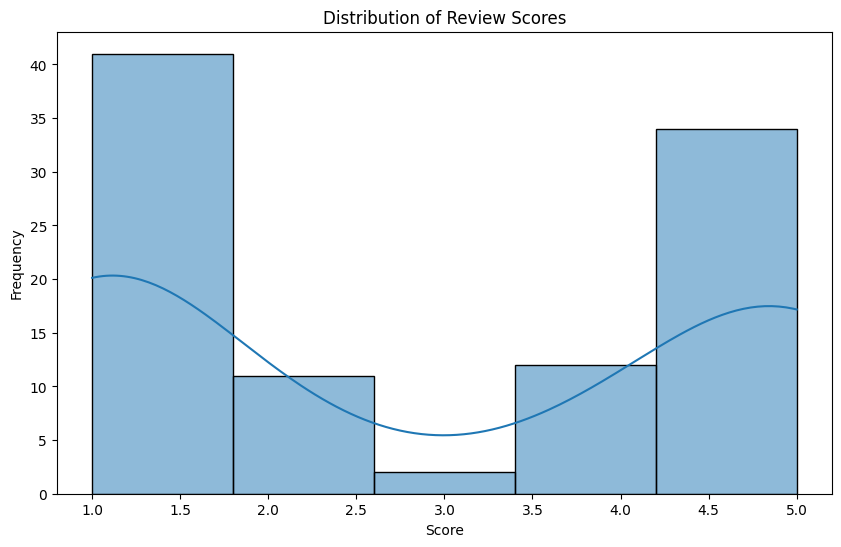

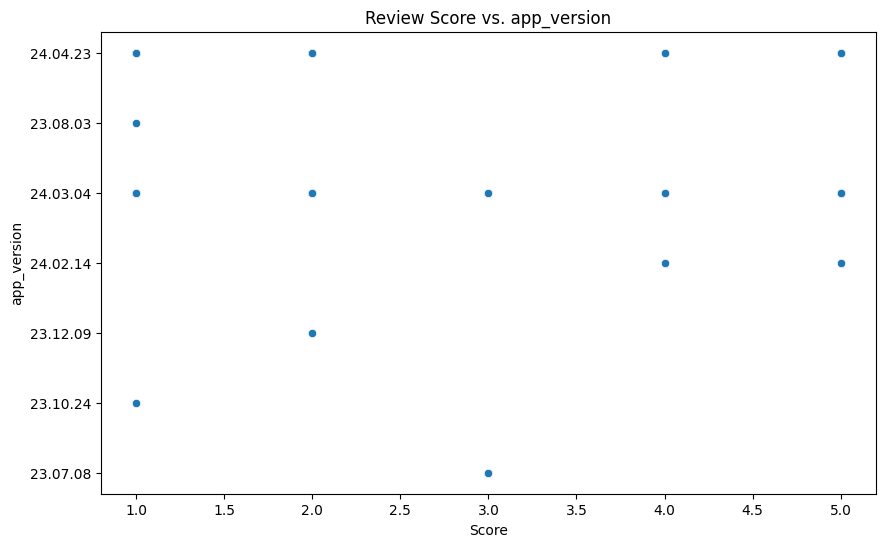

In [16]:
additional_visualizations( reviews_df)

In [19]:
# Function for additional creative visualizations
def visualizations( reviews_df):
    

    plt.figure(figsize=(10, 6))
    sns.histplot(reviews_df['likes'], bins=5, kde=True)
    plt.title('Distribution of Review likes')
    plt.xlabel('likes')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reviews_df, x='likes', y='app_version')
    plt.title('Review likes vs. app_version')
    plt.xlabel('likes')
    plt.ylabel('app_version')
    plt.show()

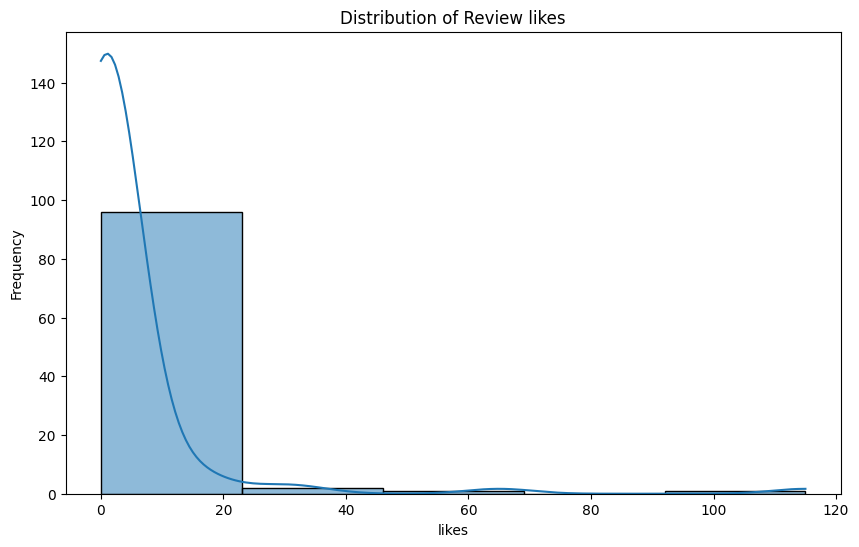

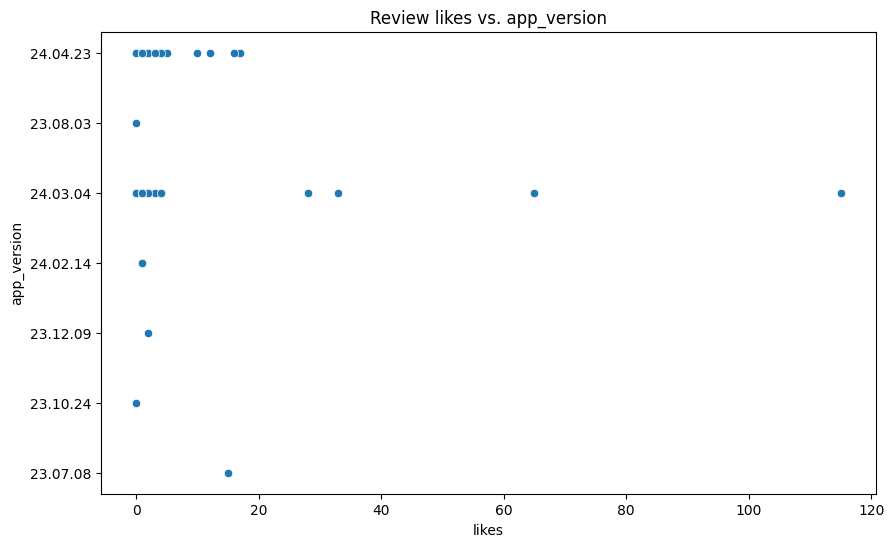

In [20]:
visualizations( reviews_df)